In [16]:
import pandas as pd
import datetime
import numpy as np
import statsmodels.api as sm
import folium
import requests
import itertools

In [17]:
# For Graphics
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 

In [18]:
data = pd.read_csv('pythons.csv')

In [19]:
data.shape

(4798, 54)

In [20]:
data.columns

Index(['objectid', 'Reporter', 'ComName', 'SciName', 'OccStatus', 'ObsDate',
       'DateAcc', 'DateEnt', 'DateUp', 'Location', 'Latitude', 'Longitude',
       'Datum', 'CoordAcc', 'Method', 'DataType', 'LocalOwner', 'Habitat',
       'Locality', 'Site', 'InfestAcre', 'GrossAcre', 'Abundance', 'Density',
       'NumCollect', 'Percentcov', 'TreatArea', 'TreatComm', 'Quantity',
       'QuantityU', 'TrapType', 'NumTraps', 'Comments', 'VisitType',
       'CollectTme', 'Surveyor', 'RecSource', 'RecOwner', 'RecSrcTyp',
       'OrigName', 'Nativity', 'Host', 'Host_Name', 'VerifyMthd', 'IDCred',
       'Verified', 'Reviewer', 'ReviewDate', 'OrgSrcID', 'PID', 'Voucher',
       'Museum', 'MuseumRec', 'Reference'],
      dtype='object')

In [21]:
col_nan = list(data.columns[data.isnull().any()])
null_col = data[col_nan]
null_col.isnull().sum()

DateAcc       4793
DateUp        3614
CoordAcc      4506
Method        2695
DataType      2479
LocalOwner    4763
Habitat       4236
Locality      2296
Site          4797
InfestAcre    4681
GrossAcre     4760
Abundance     4798
Density       4798
NumCollect    1401
Percentcov    4797
TreatArea     4798
TreatComm     4798
Quantity      4687
QuantityU     4687
TrapType      4798
NumTraps      4798
Comments      2211
VisitType     2711
CollectTme    4570
Surveyor      3246
RecSource     4798
OrigName      2510
Host          4798
Host_Name     4798
VerifyMthd      70
IDCred           4
Reviewer      3922
ReviewDate    3922
OrgSrcID      4798
PID           4798
Voucher       4313
Museum        2684
MuseumRec     4225
Reference     2480
dtype: int64

In [22]:
data.dtypes

objectid        int64
Reporter       object
ComName        object
SciName        object
OccStatus      object
ObsDate        object
DateAcc       float64
DateEnt        object
DateUp         object
Location       object
Latitude      float64
Longitude     float64
Datum          object
CoordAcc      float64
Method         object
DataType       object
LocalOwner     object
Habitat        object
Locality       object
Site           object
InfestAcre    float64
GrossAcre     float64
Abundance     float64
Density       float64
NumCollect     object
Percentcov     object
TreatArea     float64
TreatComm     float64
Quantity      float64
QuantityU      object
TrapType      float64
NumTraps      float64
Comments       object
VisitType      object
CollectTme    float64
Surveyor       object
RecSource     float64
RecOwner       object
RecSrcTyp      object
OrigName       object
Nativity       object
Host          float64
Host_Name     float64
VerifyMthd     object
IDCred         object
Verified  

## Client would like to know, among other things:


### 1.  Are sightings of Burmese pythons in the wild increasing? (Client wants an analysis with visualizations)


We create a pivot tables, where the rows are years and columns, value will be counts:
* The column that we would analyise is ObsDate
* If there is Nan Value we are going to replace wit the value in DateEnt.

In [23]:
data['ObsYear'] = pd.DatetimeIndex(data['ObsDate']).year
data['ObsMonth'] = pd.DatetimeIndex(data['ObsDate']).month
data['ObsDay'] = pd.DatetimeIndex(data['ObsDate']).day

In [24]:
data_obs_date = pd.pivot_table(
    data,
    index = ['ObsYear','ObsMonth'],
    values = 'objectid',
    aggfunc = len
)
obs_date_pivot = data_obs_date.reset_index().sort_values(by = ['ObsYear','ObsMonth'], ascending = True)

In [25]:
obs_date_pivot.head(10)
obs_date_pivot['Obs_Year-Month'] = pd.to_datetime(obs_date_pivot['ObsYear'].astype(str)  + obs_date_pivot['ObsMonth'].astype(str), format='%Y%m')
obs_date_pivot.head(10)

ObsYear  ObsMonth  objectid Obs_Year-Month
0     1979        10         1     1979-10-01
1     1995        12         1     1995-12-01
2     1996         2         1     1996-02-01
3     1996        11         1     1996-11-01
4     1997        11         4     1997-11-01
5     1998         5         1     1998-05-01
6     1998         8         1     1998-08-01
7     1999         2         2     1999-02-01
8     1999        12         1     1999-12-01
9     2000         1         2     2000-01-01

Text(0, 0.5, 'Number of sightings')

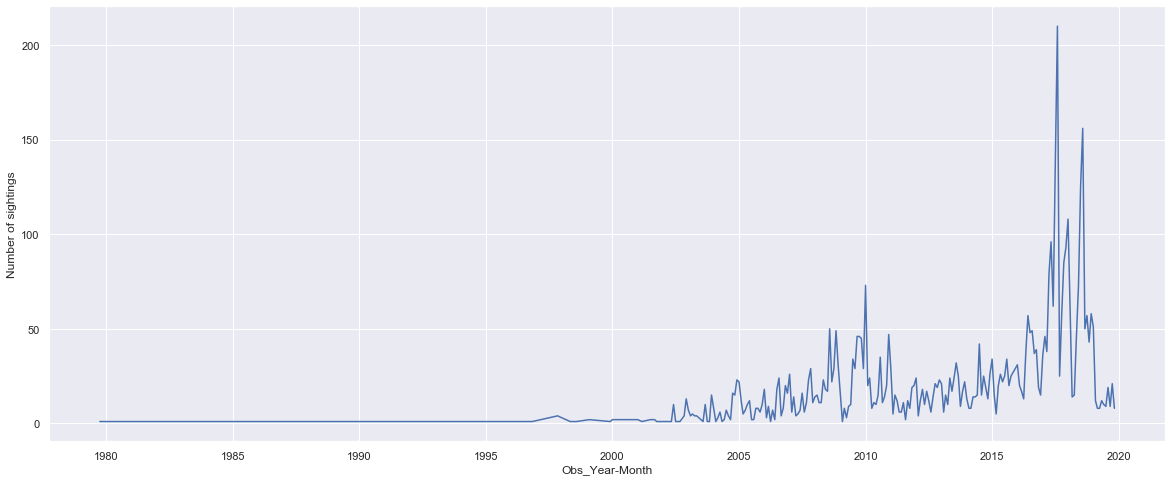

In [26]:
plt.figure(figsize=(20,8))
obs_date = sns.lineplot(x='Obs_Year-Month', y = 'objectid', data=obs_date_pivot, color="b")
obs_date.set_xlabel('Obs_Year-Month')
obs_date.set_ylabel("Number of sightings")

There is a tendecy that the seens have been growing, at the end there is a reduction it could be because there is recent data so there is less inputs

## 2. Which three counties are most affected? (Analysis + visualization)

In [27]:
counties_count = data['Location'].value_counts().rename_axis('Counties').reset_index(name='Counts')
counties = counties_count['Counties'].str.split(',', expand=True)[0]
counties_count = counties_count[['Counts']]
counties_count['Counties'] = counties
counties_count[['Counties', 'Counts']].head(3)

Counties  Counts
0  Miami-Dade    3536
1     Collier     486
2      Monroe     365

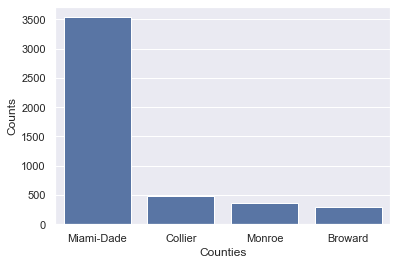

In [28]:
sns.barplot(x='Counties', y='Counts', data=counties_count[['Counties', 'Counts']].head(4),
            label="Total", color="b")

# 3. Are there geographic hotspots? If so, can you estimate the likelihood that volunteers would find pythons if we sent patrols to those areas between today's date and Dec 31st? (Analysis + viz)

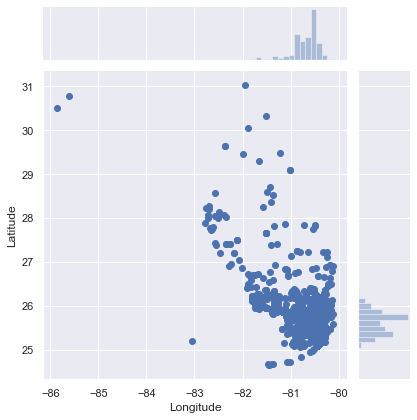

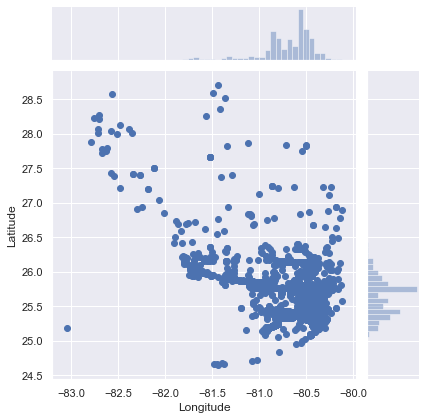

In [29]:
coordinates = pd.DataFrame(data[['Latitude', 'Longitude']])

values = pd.DataFrame(coordinates.loc[(coordinates['Latitude'] < 32.5) & (coordinates['Longitude'] < -50)])  #coordinates.loc[coordinates['Longitude'] < -50]

sns.jointplot(x="Longitude", y="Latitude", data=values);

closest = pd.DataFrame(coordinates.loc[(coordinates['Latitude'] < 29) & (coordinates['Longitude'] < -80)])

sns.jointplot(x="Longitude", y="Latitude", data=closest);

In [30]:
sight = closest.groupby(['Latitude','Longitude']).count().reset_index()
map1 = folium.Map(
    location=[43.12627,-77.53985],
    tiles='cartodbpositron',
    zoom_start=2,
)
sight.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]).add_to(map1), axis=1)
map1

### 4. When are people most likely to spot pythons, and why? (Analysis + viz)

In [31]:
data_obs_year = pd.pivot_table(
    data,
    index = ['ObsYear'],
    values = 'objectid',
    aggfunc = len
)
obs_year_pivot = data_obs_year.reset_index().sort_values(by = 'objectid', ascending = False)

In [32]:
top_years = list(set(obs_year_pivot['ObsYear'].head(8)))
top_years

[2016, 2017, 2018, 2008, 2009, 2010, 2013, 2015]

In [33]:
top_years_data = data[data.ObsYear.isin(top_years)]
top_years_data.head()

objectid                                           Reporter  \
40   8275470  matthew mccollister National Park Service, Big...   
62   8251562  FWCC Exotic Species Database Florida Fish and ...   
63   8251561  FWCC Exotic Species Database Florida Fish and ...   
64   8251560  FWCC Exotic Species Database Florida Fish and ...   
65   8251559  FWCC Exotic Species Database Florida Fish and ...   

           ComName                         SciName OccStatus      ObsDate  \
40  Burmese python  Python molurus ssp. bivittatus  Positive  13 Aug 2018   
62  Burmese python  Python molurus ssp. bivittatus   Treated  27 May 2017   
63  Burmese python  Python molurus ssp. bivittatus   Treated  15 May 2017   
64  Burmese python  Python molurus ssp. bivittatus   Treated  10 May 2017   
65  Burmese python  Python molurus ssp. bivittatus   Treated  07 May 2017   

    DateAcc      DateEnt       DateUp                            Location  \
40      NaN  27 Sep 2019  27 Sep 2019  Miami-Dade, Florida, United States   
62      NaN  03 Aug 2019          NaN  Miami-Dade, Florida, United States   
63      NaN  03 Aug 2019          NaN  Miami-Dade, Florida, United States   
64      NaN  03 Aug 2019          NaN  Miami-Dade, Florida, United States   
65      NaN  03 Aug 2019          NaN  Miami-Dade, Florida, United States   

    ...   ReviewDate  OrgSrcID PID  Voucher Museum MuseumRec Reference  \
40  ...  27 Sep 2019       NaN NaN      NaN    NaN       NaN       NaN   
62  ...          NaN       NaN NaN      NaN    NaN       NaN       NaN   
63  ...          NaN       NaN NaN      NaN    NaN       NaN       NaN   
64  ...          NaN       NaN NaN      NaN    NaN       NaN       NaN   
65  ...          NaN       NaN NaN      NaN    NaN       NaN       NaN   

   ObsYear ObsMonth ObsDay  
40    2018        8     13  
62    2017        5     27  
63    2017        5     15  
64    2017        5     10  
65    2017        5      7  

[5 rows x 57 columns]

In [34]:
data_month_topyears = pd.pivot_table(
    top_years_data,
    index = ['ObsMonth'],
    columns = ['ObsYear'],
    values = ['objectid'],
    aggfunc = 'count',
    margins = True
)

data_month_topyears.columns = data_month_topyears.columns.droplevel(0) # We got multiindex, we dropped one level
print(data_month_topyears)
data_month_topyears = data_month_topyears.head(12)
data_month_topyears

ObsYear   2008  2009  2010  2013  2015  2016  2017  2018   All
ObsMonth                                                      
1           14    16    73    21    34    31    36   108   333
2           15     1    20     6    15    20    46    58   181
3           11     8    24    15     5    17    38    14   132
4           11     3     8    10    20    13    79    15   159
5           23     9    11    24    26    37    96    45   271
6           18    10    10    17    22    57    62    73   269
7           17    34    15    24    25    48   137   125   425
8           50    29    35    32    34    49   210   156   595
9           22    46    11    25    20    37    25    50   236
10          29    46    14     9    25    39    57    57   276
11          49    45    20    17    27    19    85    43   305
12          31    29    47    22    29    15    93    58   324
All        290   276   288   222   282   382   964   802  3506


ObsYear   2008  2009  2010  2013  2015  2016  2017  2018  All
ObsMonth                                                     
1           14    16    73    21    34    31    36   108  333
2           15     1    20     6    15    20    46    58  181
3           11     8    24    15     5    17    38    14  132
4           11     3     8    10    20    13    79    15  159
5           23     9    11    24    26    37    96    45  271
6           18    10    10    17    22    57    62    73  269
7           17    34    15    24    25    48   137   125  425
8           50    29    35    32    34    49   210   156  595
9           22    46    11    25    20    37    25    50  236
10          29    46    14     9    25    39    57    57  276
11          49    45    20    17    27    19    85    43  305
12          31    29    47    22    29    15    93    58  324

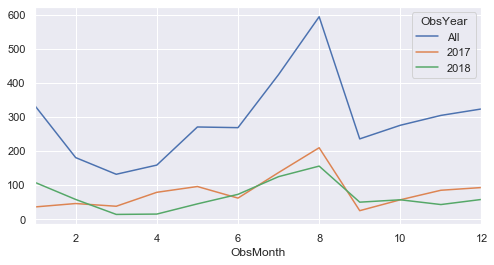

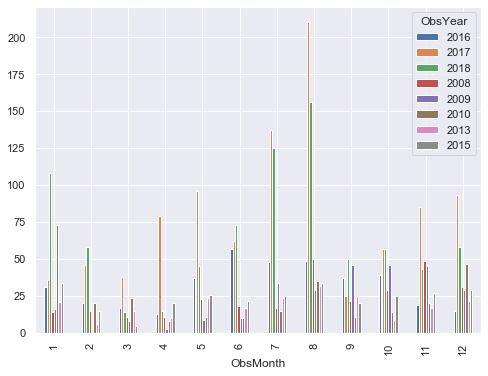

In [35]:
data_month_topyears.plot(kind = 'line', figsize=(8, 4), y = ['All',2017,2018])
data_month_topyears[top_years].plot(kind = 'bar', figsize=(8, 6))

During the years we can observe that the month of August and July we can seen more burmese python, then jump to the winter month.
There is a rare tendency, so we start selecting the data by year:, 
* All Data.
* Top 10 years.
* Top 5 years.
* 2017 (Year with more sights)
* 2018 (2nd Year with more sights)

https://myfwc.com/wildlifehabitats/nonnatives/python/faqs/


During `warm months` they like to stay in the water, but they are more active at night; most pythons are found crossing roads during late hours.

`During cooler months` you can find them outside the water; they move away from the vegetation edges later on the day.

`February, March, April` these are the breeding month, they stay close to the nest and water edges.


So yes, there you can see that there is a seasonal tendecy that is why you can find more during the warm and cooler months.

### 5. Are sightings cyclical? (Analysis + viz)

We are going to analyse [20`5 - 2018] period

In [36]:
cyclical_analysis = data[data.ObsYear.isin(list(range(2008, 2020)))]
cyclical_analysis.head()

objectid                                           Reporter  \
0   8303498                                Travis Mangione FWC   
1   8303147                             Edward F. Metzger III    
2   8298008  Michael Reupert NPS  Big Cypress National Pres...   
3   8295649  matthew mccollister National Park Service, Big...   
4   8295647  matthew mccollister National Park Service, Big...   

          ComName                         SciName OccStatus      ObsDate  \
0  Burmese python  Python molurus ssp. bivittatus  Positive  24 Nov 2019   
1  Burmese python  Python molurus ssp. bivittatus  Positive  20 Nov 2019   
2  Burmese python  Python molurus ssp. bivittatus  Positive  07 Nov 2019   
3  Burmese python  Python molurus ssp. bivittatus  Positive  06 Nov 2019   
4  Burmese python  Python molurus ssp. bivittatus  Positive  05 Nov 2019   

   DateAcc      DateEnt       DateUp                            Location  ...  \
0      NaN  26 Nov 2019          NaN  Miami-Dade, Florida, United States  ...   
1      NaN  22 Nov 2019  22 Nov 2019     Broward, Florida, United States  ...   
2      NaN  12 Nov 2019          NaN     Collier, Florida, United States  ...   
3      NaN  07 Nov 2019          NaN     Collier, Florida, United States  ...   
4      NaN  07 Nov 2019          NaN     Collier, Florida, United States  ...   

    ReviewDate  OrgSrcID PID  Voucher  \
0  05 Dec 2019       NaN NaN      0.0   
1  05 Dec 2019       NaN NaN      NaN   
2  14 Nov 2019       NaN NaN      0.0   
3  08 Nov 2019       NaN NaN      0.0   
4  08 Nov 2019       NaN NaN      0.0   

                                              Museum MuseumRec Reference  \
0                                                NaN       NaN       NaN   
1                                                NaN       NaN       NaN   
2  HQ freezer                                    ...       NaN       NaN   
3                                                NaN       NaN       NaN   
4                                                NaN       NaN       NaN   

  ObsYear ObsMonth ObsDay  
0    2019       11     24  
1    2019       11     20  
2    2019       11      7  
3    2019       11      6  
4    2019       11      5  

[5 rows x 57 columns]

In [37]:
print(cyclical_analysis.shape)

cyclical_analysis['datetime'] = pd.to_datetime(cyclical_analysis['ObsDate'])
cyclical_analysis = cyclical_analysis.set_index('datetime')
cyclical_analysis.drop(['ObsDate'], axis=1, inplace=True)
print(cyclical_analysis.shape)

(4210, 57)
(4210, 56)
C:\Users\Yailin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
test = cyclical_analysis.groupby('datetime')[['objectid']].count()
test.head(20)

objectid
datetime            
2008-01-10         1
2008-01-12         1
2008-01-13         1
2008-01-14         1
2008-01-15         1
2008-01-16         4
2008-01-17         1
2008-01-18         1
2008-01-20         1
2008-01-28         1
2008-01-30         1
2008-02-02         1
2008-02-03         1
2008-02-04         1
2008-02-08         1
2008-02-14         1
2008-02-19         1
2008-02-20         1
2008-02-24         1
2008-02-25         1

In [39]:
a = test.resample('14D').count()
a.head(20)

objectid
datetime            
2008-01-10         9
2008-01-24         5
2008-02-07         4
2008-02-21         4
2008-03-06         3
2008-03-20         4
2008-04-03         2
2008-04-17         5
2008-05-01         7
2008-05-15         4
2008-05-29         6
2008-06-12         7
2008-06-26         3
2008-07-10         4
2008-07-24        10
2008-08-07         7
2008-08-21         8
2008-09-04         9
2008-09-18         5
2008-10-02         6

In [40]:
a = a.replace(0, None)

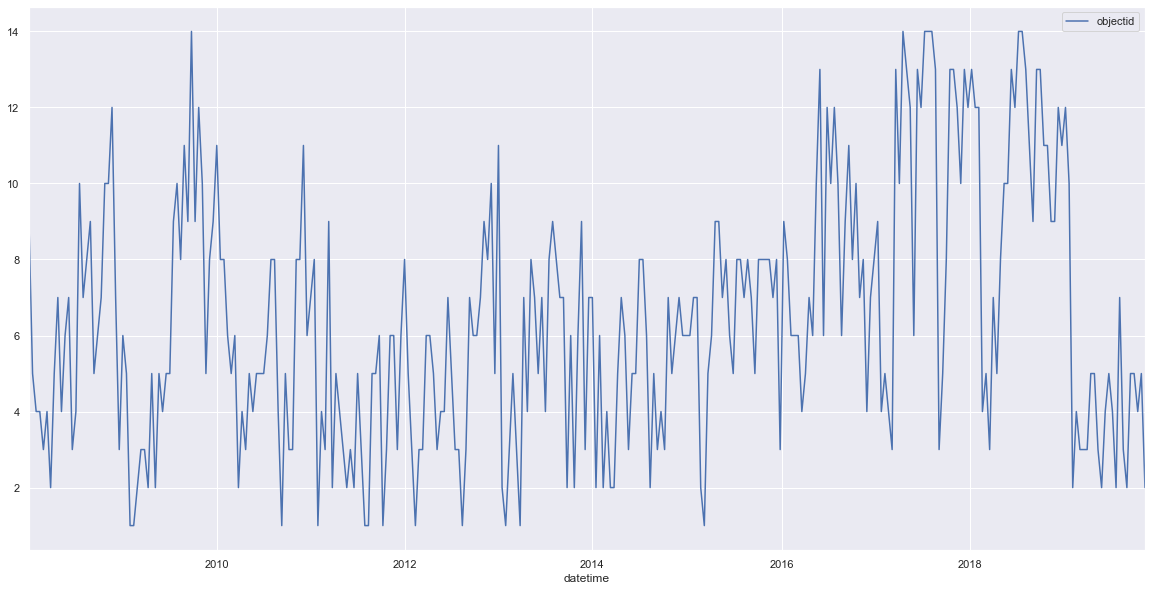

In [41]:
a.reset_index().plot(x='datetime', y='objectid', figsize =(20,10))

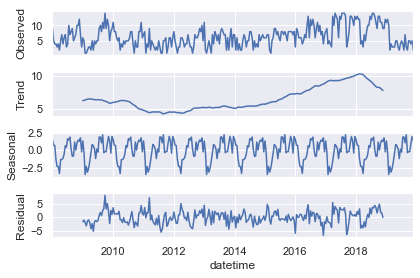

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

_ = seasonal_decompose(a).plot()

Definetly the sigts are cyclical between the month; but yearly there is a trend, increasing from 2014 to 2017 when it reach its plateau, being lower 2018 and 2019.

### 6. How many python observations do you predict will be recorded for the full 2019 year? (time-series analysis)

## ARMA

In [43]:
b = a['objectid']

In [44]:
train = b[:-23]
test = b[-23:]

print(train.head(), test.head())
#Starting on 2008

datetime
2008-01-10    9
2008-01-24    5
2008-02-07    4
2008-02-21    4
2008-03-06    3
Freq: 14D, Name: objectid, dtype: int64 datetime
2019-01-10    12
2019-01-24    10
2019-02-07     2
2019-02-21     4
2019-03-07     3
Freq: 14D, Name: objectid, dtype: int64


In [45]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(
    train,
    order = (2,1) 
).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               objectid   No. Observations:                  287
Model:                     ARMA(2, 1)   Log Likelihood                -671.693
Method:                       css-mle   S.D. of innovations              2.510
Date:                Mon, 16 Dec 2019   AIC                           1353.386
Time:                        20:38:03   BIC                           1371.684
Sample:                    01-10-2008   HQIC                          1360.720
                         - 12-27-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.6453      0.534     12.438      0.000       5.598       7.692
ar.L1.objectid     0.5782      0.335      1.724      0.086      -0.079       1.235
ar.L2.objectid     0.1770      0.220      0.803      0.423      -0.255       0.609
ma.L1.objectid    -0.1069      0.345     -0.309      0.757      -0.784       0.570
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2506           +0.0000j            1.2506            0.0000
AR.2           -4.5168           +0.0000j            4.5168            0.5000
MA.1            9.3533           +0.0000j            9.3533            0.0000
-----------------------------------------------------------------------------
"""

In [46]:
predictions = model.predict(
    start = len(train),
    end = len(train) + len(test) -1
)

obs_pre = pd.DataFrame({
    'observed' : test,
    'predicted' : predictions
})
obs_pre

observed  predicted
datetime                       
2019-01-10        12   9.980170
2019-01-24        10   9.344482
2019-02-07         2   8.796376
2019-02-21         4   8.366915
2019-03-07         3   8.021562
2019-03-21         3   7.745846
2019-04-04         3   7.525284
2019-04-18         5   7.348941
2019-05-02         5   7.207931
2019-05-16         3   7.095178
2019-05-30         2   7.005019
2019-06-13         4   6.932927
2019-06-27         5   6.875281
2019-07-11         4   6.829187
2019-07-25         2   6.792330
2019-08-08         7   6.762858
2019-08-22         3   6.739292
2019-09-05         2   6.720449
2019-09-19         5   6.705381
2019-10-03         5   6.693333
2019-10-17         4   6.683699
2019-10-31         5   6.675996
2019-11-14         2   6.669836

In [47]:
from statsmodels.tools.eval_measures import rmse

rmse(test, predictions)

3.6546904179090838

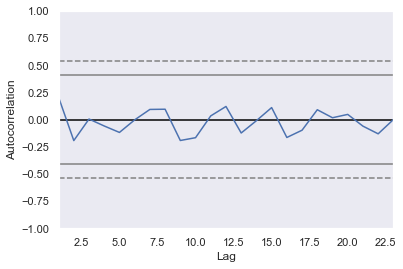

In [48]:
pd.plotting.autocorrelation_plot(test)

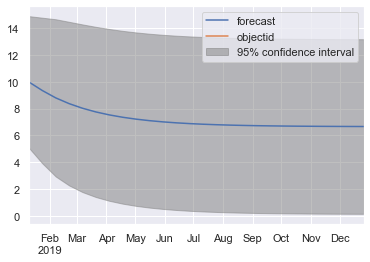

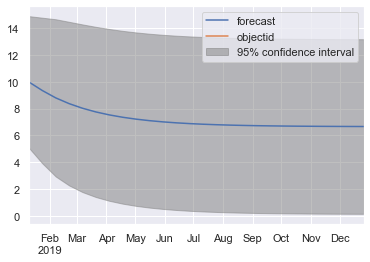

In [49]:
model.plot_predict(
    start = len(train),
    end = len(train) + len(test) +2
)

In [50]:
prediction2019 = predictions = model.predict(
    start = len(train),
    end = len(train) + len(test)+2
)
prediction2019.sum().round()

190.0

In [51]:
obs_pre.sum().round()

observed     100.0
predicted    170.0
dtype: float64

## ARIMA

In [52]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 26)
SARIMAX: (0, 0, 1) x (0, 1, 0, 26)
SARIMAX: (0, 1, 0) x (0, 1, 1, 26)
SARIMAX: (0, 1, 0) x (1, 0, 0, 26)


This step is parameter Selection for our observations ARIMA Time Series Model. Our goal here is to use a “grid search” to find the optimal set of parameters that yields the best performance for our model.

In [53]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(a,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}26 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 26)26 - AIC:2099.5497262961703
ARIMA(0, 0, 0)x(0, 0, 1, 26)26 - AIC:1761.8038437895902
ARIMA(0, 0, 0)x(0, 1, 0, 26)26 - AIC:1587.376796313145
ARIMA(0, 0, 0)x(0, 1, 1, 26)26 - AIC:1378.3753540703342
ARIMA(0, 0, 0)x(1, 0, 0, 26)26 - AIC:1570.0815459373316
ARIMA(0, 0, 0)x(1, 0, 1, 26)26 - AIC:1514.3782149766002
ARIMA(0, 0, 0)x(1, 1, 0, 26)26 - AIC:1408.4242382982752
ARIMA(0, 0, 0)x(1, 1, 1, 26)26 - AIC:1380.3751949401967
ARIMA(0, 0, 1)x(0, 0, 0, 26)26 - AIC:1857.2219258574198
ARIMA(0, 0, 1)x(0, 0, 1, 26)26 - AIC:1629.6926192214837
ARIMA(0, 0, 1)x(0, 1, 0, 26)26 - AIC:1539.6188607276385
ARIMA(0, 0, 1)x(0, 1, 1, 26)26 - AIC:1314.3992846746503
ARIMA(0, 0, 1)x(1, 0, 0, 26)26 - AIC:1516.5660366247125
ARIMA(0, 0, 1)x(1, 0, 1, 26)26 - AIC:1447.9733215609947
ARIMA(0, 0, 1)x(1, 1, 0, 26)26 - AIC:1354.0488195262162
ARIMA(0, 0, 1)x(1, 1, 1, 26)26 - AIC:1330.356939017332
ARIMA(0, 1, 0)x(0, 0, 0, 26)26 - AIC:1519.643384432723
ARIMA(0, 1, 0)x(0, 0, 1, 26)26 - AIC:1397.068501482

In [54]:
mod = sm.tsa.statespace.SARIMAX(a,
                                order=(1, 0, 1),
                                seasonal_order=(0, 1, 1, 26),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
arima_results = mod.fit()
# print(arima_results.summary().tables[1])

arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                           objectid   No. Observations:                  310
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 26)   Log Likelihood                -614.777
Date:                            Mon, 16 Dec 2019   AIC                           1237.554
Time:                                    20:39:45   BIC                           1251.734
Sample:                                01-10-2008   HQIC                          1243.257
                                     - 11-14-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9115      0.034     26.473      0.000       0.844       0.979
ma.L1         -0.5447      0.076     -7.168      0.000      -0.694      -0.396
ma.S.L26      -0.8625      0.089     -9.706      0.000      -1.037      -0.688
sigma2         6.5932      0.603     10.941      0.000       5.412       7.774
===================================================================================
Ljung-Box (Q):                       36.87   Jarque-Bera (JB):                 3.14
Prob(Q):                              0.61   Prob(JB):                         0.21
Heteroskedasticity (H):               1.47   Skew:                            -0.06
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The above output suggests that SARIMA(1, 0, 1)x(0, 1, 1, 26)26 yields the lowest AIC value of 1237.55. Therefore we should consider this to be optimal option.

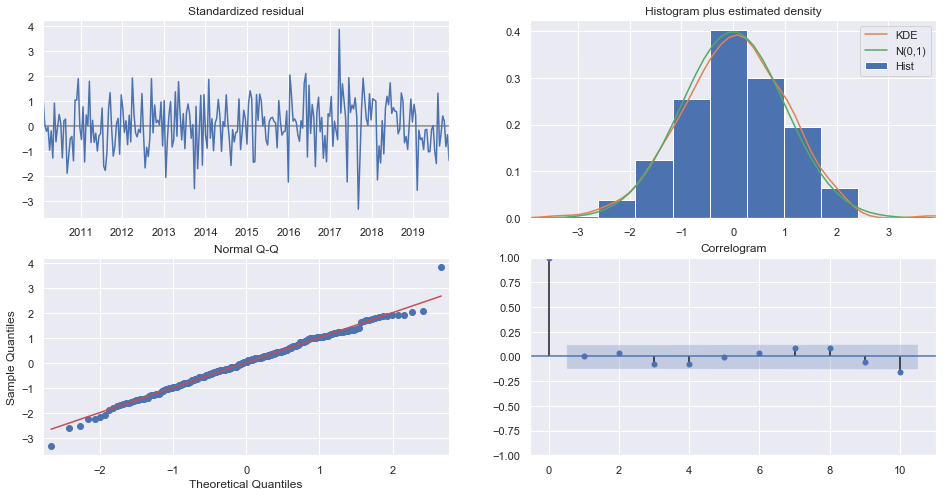

In [55]:
arima_results.plot_diagnostics(figsize=(16, 8))
plt.show()

It is not perfect, however, our model diagnostics suggests that the model residuals are near normally distributed.

# Forecast and Predictions

In [56]:
pred = arima_results.get_prediction(start = len(train),end = len(train) + len(test) -1, dynamic=False)
pred_ci = pred.conf_int()
# ax = ['2014':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('Date')
# ax.set_ylabel('Furniture Sales')
# plt.legend()
# plt.show()
pred

In [57]:
#ARMA
ARMA2019_pred = model.predict(start = len(train),end = len(train) + len(test) +2) #Observ and ARMA Table

ARMA2019 = pd.DataFrame({
    'observed' : test,
    'ARMA' : ARMA2019_pred
})

# ARIMA
ARIMA2019 = arima_results.get_prediction(start = len(train),end = len(train) + len(test) +2, dynamic=False)

ARI_MAX_MIN = ARIMA2019.conf_int() # MAX and Min Arima Table

ARI_MEAN = ARIMA2019.predicted_mean
ARMA2019['ARIMA2019'] = ARI_MEAN

ARMA2019.sum()


observed     100.000000
ARMA         189.501979
ARIMA2019    139.135083
dtype: float64

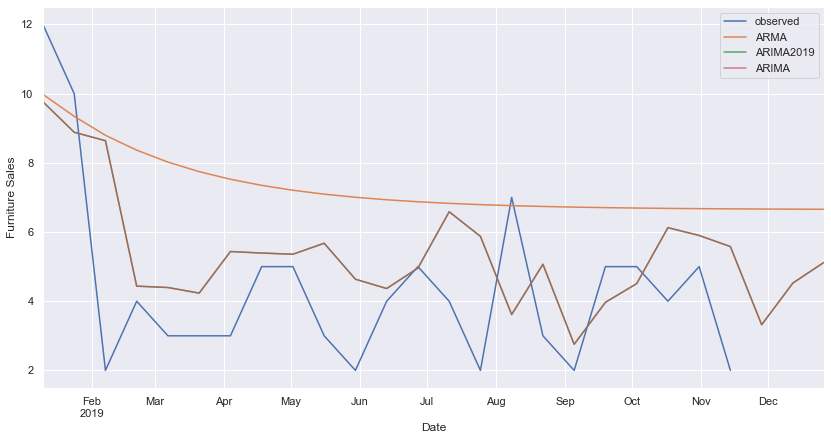

In [58]:
ax = ARMA2019.plot()
ARI_MEAN.plot(ax=ax, label='ARIMA', alpha=.7, figsize=(14, 7))
# ax.fill_between(ARI_MAX_MIN.index,
#                 ARI_MAX_MIN.iloc[:, ],
#                 ARI_MAX_MIN.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# iNaturalist

In [59]:
url = "https://api.inaturalist.org/v1/observations?verifiable=true&order_by=observations.id&order=desc&spam=false&place_id=21&taxon_id=238252&locale=en-US&per_page=100"
response = requests.get(url)
results = response.json()

In [60]:
inaturalist = pd.DataFrame(results)
inaturalist.head(10)

total_results  page  per_page  \
0             83     1       100   
1             83     1       100   
2             83     1       100   
3             83     1       100   
4             83     1       100   
5             83     1       100   
6             83     1       100   
7             83     1       100   
8             83     1       100   
9             83     1       100   

                                             results  
0  {'out_of_range': True, 'quality_grade': 'resea...  
1  {'out_of_range': True, 'quality_grade': 'resea...  
2  {'out_of_range': True, 'quality_grade': 'resea...  
3  {'out_of_range': True, 'quality_grade': 'resea...  
4  {'out_of_range': True, 'quality_grade': 'resea...  
5  {'out_of_range': True, 'quality_grade': 'resea...  
6  {'out_of_range': True, 'quality_grade': 'resea...  
7  {'out_of_range': True, 'quality_grade': 'resea...  
8  {'out_of_range': True, 'quality_grade': 'resea...  
9  {'out_of_range': True, 'quality_grade': 'resea...

In [61]:
from pandas.io.json import json_normalize
flattened_data = json_normalize(inaturalist['results'])
flattened_data

out_of_range quality_grade           time_observed_at taxon_geoprivacy  \
0          True      research  2015-02-23T08:17:00-05:00             None   
1          True      research  2019-11-27T21:00:58-05:00             None   
2          True      research  2019-11-27T19:49:24-05:00             None   
3          True      research  2019-11-10T22:04:09-05:00             None   
4          True      research  2019-11-05T18:21:16-05:00             None   
..          ...           ...                        ...              ...   
78         True      research  2015-11-04T19:40:57-08:00             None   
79         True      research                       None             None   
80         None      research  2014-03-02T10:20:00-06:00             None   
81         None      research  2014-01-26T11:00:00-05:00             None   
82         None      research  2012-01-22T11:20:00-06:00             None   

                                          annotations context_user_geoprivacy  \
0                                                  []                    None   
1                                                  []                    None   
2                                                  []                    None   
3                                                  []                    None   
4                                                  []                    None   
..                                                ...                     ...   
78                                                 []                    None   
79  [{'user_id': 516268, 'concatenated_attr_val': ...                    None   
80                                                 []                    None   
81  [{'user_id': 516268, 'concatenated_attr_val': ...                    None   
82                                                 []                    None   

                                    uuid        id  cached_votes_total  \
0   d25c6eb2-e5c1-485d-80ae-d9d8eb2f6a52  36693495                   0   
1   c20ce707-7ce3-4be0-9916-19ccf70cb286  36162544                   0   
2   128ce356-3aeb-40ef-8caa-b394e163b965  36162417                   0   
3   0131e350-538e-4ee2-be4a-dc0f8836677d  35585367                   1   
4   0b4a2d5b-af68-4604-a957-e9bf6a08f0e9  35350568                   0   
..                                   ...       ...                 ...   
78  1d752be7-1e96-48d3-ac4e-102123780c50   2585187                   1   
79  5c85adc4-8748-4c4a-a0cb-0809f143c470   1842481                   1   
80  f9fe2eee-9b6b-4b3c-ba6d-775db093f352    553763                   1   
81  8a42f51d-6253-4267-8ab4-2894d5fa7a6b    515110                   1   
82  51068b10-a5a7-4b90-bbac-022a07ca2b62    416664                   1   

    identifications_most_agree  ... user.orcid  \
0                         True  ...       None   
1                         True  ...       None   
2                         True  ...       None   
3                         True  ...       None   
4                         True  ...       None   
..                         ...  ...        ...   
78                        True  ...       None   
79                        True  ...       None   
80                        True  ...       None   
81                        True  ...       None   
82                        True  ...       None   

                                            user.icon user.observations_count  \
0                                                None                     594   
1                                                None                      12   
2                                                None                      12   
3                                                None                      12   
4   https://static.inaturalist.org/attachments/use...                    6514   
..                                                ...                     ...   
78  https://static.inaturalist.org/attachments/u

## Should we be using iNaturalist to get the public more engaged? (Back your answer with data)

In [62]:
flattened_data.shape[0]

83

Since we have only 83 observation, we should not use iNaturalist to get the public to engage.

## Which iNaturalist users are most active in sighting pythons?

In [63]:
users = pd.pivot_table(
    data =  flattened_data,
    index='user.login',
    values= 'id',
    aggfunc=len
)
top_active_users = users.reset_index().sort_values(by = 'id', ascending = False).head(5)
top_active_users

user.login  id
35            pythonbob  12
23               joemdo   6
3               atrox77   4
29              michiko   4
39  snakesareprettycool   3

Text(0, 0.5, 'Users')

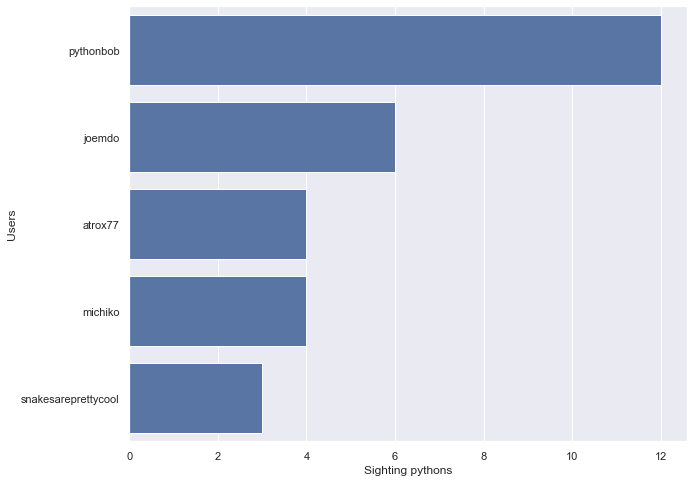

In [64]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="id", y="user.login", data=top_active_users, color="b")
ax.set_xlabel("Sighting pythons")
ax.set_ylabel("Users")

## Which iNaturalist users are most active in identifying pythons? 

In [65]:
list(flattened_data.columns)
obs = flattened_data[['id', 'reviewed_by', 'quality_grade']]
obs = obs[obs['quality_grade'] == 'research']
obs.head()

id                                reviewed_by quality_grade
0  36693495         [268311, 971085, 1104294, 1871474]      research
1  36162544                  [769610, 971085, 2320836]      research
2  36162417         [268311, 971085, 2008097, 2320836]      research
3  35585367                  [268311, 971085, 2320836]      research
4  35350568  [281081, 324885, 769610, 971085, 1737389]      research

In [66]:
dfToList = obs['reviewed_by'].tolist()
flat_list = []
for sublist in dfToList:
    for item in sublist:
        flat_list.append(item)


Text(0, 0.5, 'Idenfiying Pythons')

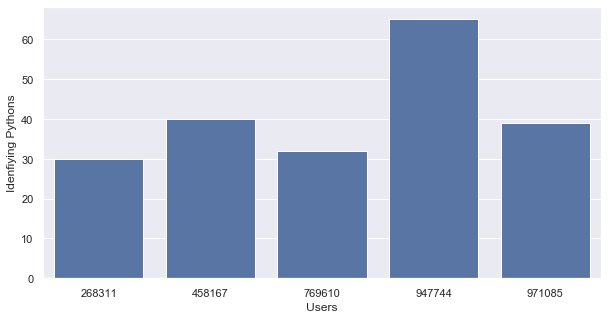

In [122]:
idenfiying_pythons = pd.DataFrame(flat_list)[0].value_counts().head(5)
plt.figure(figsize=(10,5))
ax = sns.barplot(idenfiying_pythons.index, idenfiying_pythons.values, color="b")
ax.set_xlabel("Users")
ax.set_ylabel("Idenfiying Pythons")

## Which iNaturalist users are most connected in the python-spotting community (i.e. who are the influencers)?


In [136]:
# Getting combos
from itertools import combinations
df = flattened_data[['id', 'reviewed_by']]
pd.concat([pd.Series(row['id'], str(row['reviewed_by']).split(','))              
for _, row in df.iterrows()]).reset_index()
df_combos = pd.concat([pd.Series(row['id'], str(row['reviewed_by']).split(','))              
for _, row in df.iterrows()]).reset_index()
df_combos.columns = ['id', 'reviewed_by']
df_combos['id'] = combos['id'].str.replace('[', '')
df_combos['id'] = combos['id'].str.replace(']', '')
combos = list(df_combos.itertuples(index=False))


In [143]:
len(combos) #498 pairs

498

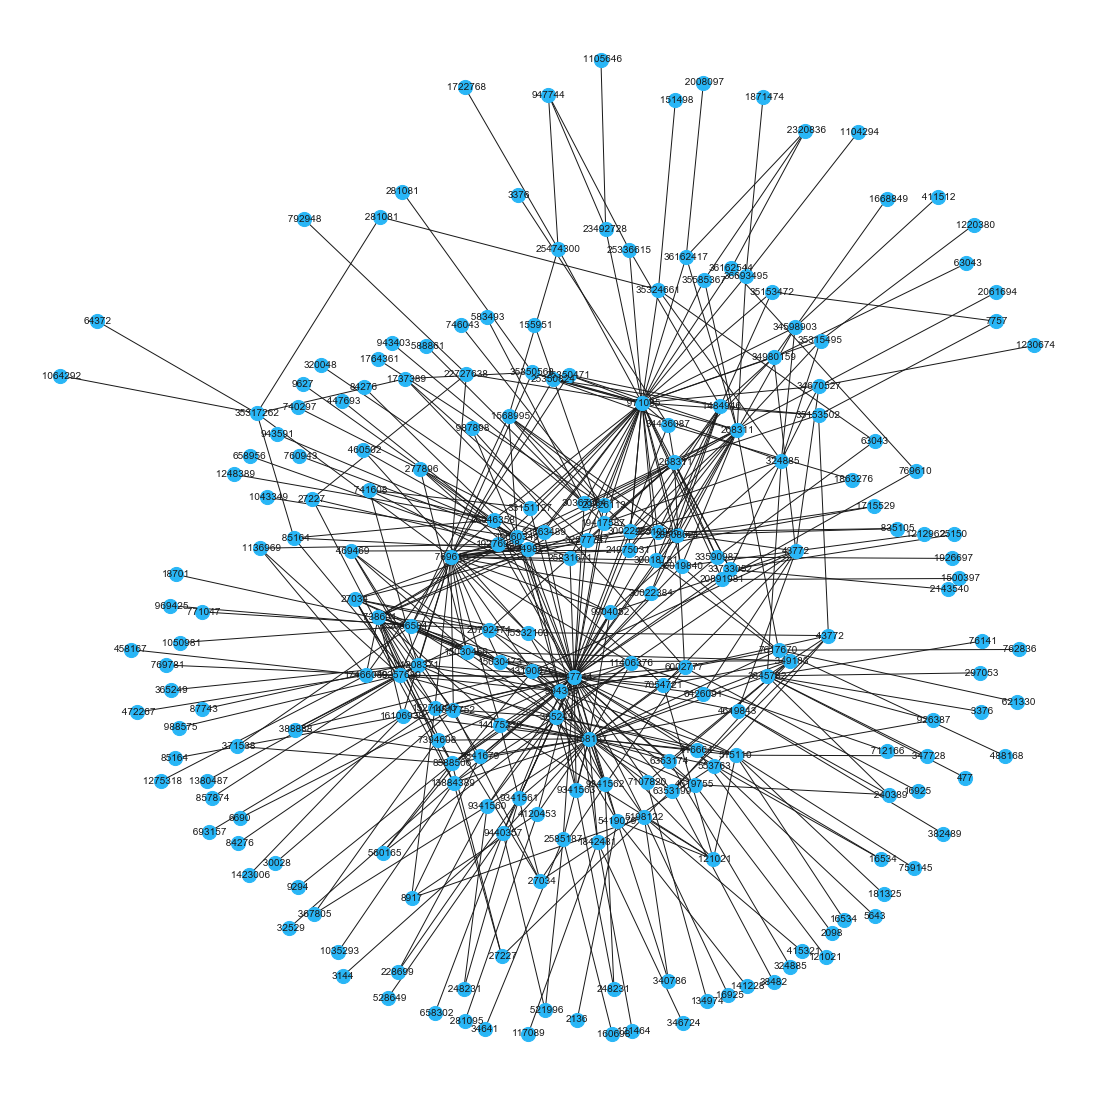

In [141]:
G.add_edges_from(combos)
plt.figure(3,figsize=(15,15)) 
nx.draw_kamada_kawai(G,
        with_labels = True,
        node_size = 200,
        font_size = 10,
        node_color = '#29b6f6',
        alpha = 1 
)

In [144]:
# Top 5 Influencers
sorted(nx.degree_centrality(G), key=nx.degree_centrality(G).get, reverse = True)[:5] #Measuse of popularity base on a node's degree

[' 947744', ' 971085', ' 458167', ' 769610', ' 994388']

## Is there overlap between the observers in the two datasets (i.e., are any wildlife officials also using iNaturalist)? 

In [147]:
# Cleaning user.name missing values from flattened_data
flattened_data_cleaned = flattened_data.copy()
flattened_data.dropna(subset=['user.name'], inplace = True)
flattened_data_cleaned.shape[0]

56

In [182]:
# Cleaning Reporter from data 
data_reporter = data[['Reporter']]
data_reporter['Name1'] = data_reporter['Reporter'].str.split(" ", expand = True)[0]
data_reporter['Name2'] = data_reporter['Reporter'].str.split(" ", expand = True)[0] + ' ' + data_reporter['Reporter'].str.split(" ", expand = True)[1]

C:\Users\Yailin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Yailin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [183]:
val1 = np.intersect1d(flattened_data['user.name'], data_reporter['Name1'])
val1 

array(['Joey', 'Michiko'], dtype=object)

In [184]:
val2 = np.intersect1d(flattened_data['user.name'], data_reporter['Name2'])
val2

array(['Hunter Howell', 'Joshua Sands'], dtype=object)

In [191]:
print("Users/Reporters overlap:")
for val in val1:
    print(val)
for val in val2:
    print(val)

Users/Reporters overlap:
Joey
Michiko
Hunter Howell
Joshua Sands
